# 결과 시각화 및 검증

이전 노트북에서 다양한 기계 학습 모델을 훈련하고 훈련된 모델을 사용하여 예측하는 방법을 배웠습니다. 그러나 우리는 모델의 성능을 평가하거나 모델의 출력 결과를 시각화하는 방법에 초점을 맞추지는 않았습니다. 이번 노트북에서는 다양한 시각화 도구를 사용하여 모델의 성능을 평가하는 방법에 중점을 둘 것입니다. 이 노트북에서는 혼동 행렬(confusion matrix)과 히트맵(heatmap)을 활용하여 모델을 평가하는 방법을 배우게 됩니다. 이러한 도구는 모델의 정확성을 식별하는 데 도움이 됩니다.

먼저 정확도의 개념을 이해할 필요가 있습니다. 좋은 모델이 되려면 모델이 얼마나 정확해야 할까요? 답은 모델의 사용 사례에 따라 다릅니다. 예를 들어, 막대한 재정적 금액이나 질병 식별과 관련된 모델은 거의 100% 정확도를 가져야 합니다. 이는 모델이 몇 퍼센트만 잘못되었을 경우에도 많은 사람들에게 영향을 미칠 수 있는 중요한 문제가 발생하기 때문입니다. 반면에 영화 추천이나 비디오 추천을 예측하는 경우 잘못된 예측의 영향이 이전에 언급한 시나리오만큼 심각하지 않기 때문에 정확도가 낮더라도 괜찮을 수 있습니다. 또한 100% 정확성을 얻기 위해서는 문제와 관련된 모든 데이터를 수집할 수 있어야 하기 때문에 100% 정확성을 얻는 것은 거의 불가능하다는 점도 이해해야 합니다. 따라서 모델의 정확성과 보유한 데이터의 양 및 사용 사례의 균형을 유지해야 합니다. 그렇다고 낮은 정확도에 만족하고 모델 훈련을 중지해도 괜찮다는 의미는 아닙니다. 지속적으로 여러 방법을 시도하여 정확도를 더 좋게 만들 수 있는지 확인해야 합니다. 많은 방법을 시도했지만 정확도를 향상시킬 수 없는 경우에만 정확도가 사용 사례에 대해 충분히 좋은지 결정할 수 있습니다.

이제 이전 노트북에서 시도한 기계 학습 기술에 대한 시각화 도구를 어떻게 사용할 수 있는지 알아보겠습니다.

In [20]:
# Import your libraries here
# 데이터 분석 라이브러리
import pandas as pd     # 데이터프레임 생성과 조작을 위한 라이브러리
import numpy as np      # 수치 연산을 위한 라이브러리

# 시각화 라이브러리
import matplotlib.pyplot as plt     # 기본적인 플로팅 기능 제공
import seaborn as sns               # 데이터 시각화에 유용한 고수준 인터페이스 제공
import plotly.express as px         # 대화형 플롯 생성을 위한 라이브러리
import plotly.graph_objects as go   # Plotly의 그래프 객체 사용

# 기계 학습 및 데이터 전처리 라이브러리
from sklearn.model_selection import train_test_split   # 데이터 분할을 위한 함수
from sklearn.preprocessing import StandardScaler       # 데이터 표준화를 위한 클래스
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # 성능 평가를 위한 함수

In [21]:
import urllib.request

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', "iris.data")
df= pd.read_csv('iris.data', header=None)
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = names

print(df.head())
df.describe()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1. K-최근접 이웃 알고리즘(K-Nearest Neighbours)

Iris Flower 데이터 세트에서 KNN 알고리즘을 다시 사용할 것입니다. 데이터 세트를 데이터 프레임 df로 가져오고 데이터 세트를 레이블 인코딩합니다. 레이블 인코딩은 범주를 숫자 그룹으로 변환하는 것입니다. 데이터 클래스를 숫자로 인코딩하는 함수 코드를 작성해 보세요(label_encode). 함수로 작성해두면 노트북에서 필요한 경우 레이블 인코딩 코드를 재사용할 수 있습니다. 이 [문서](https://www.codementor.io/kaushikpal/user-defined-functions-in-python-8s7wyc8k2) 를 읽고 사용자 정의 함수를 작성하는 방법을 알아보세요. 우리가 코드를 작성할 때 함수가 스크립트에서 두 번 이상 사용될 것이라고 생각하면 함수를 작성하는 것이 항상 유용합니다. 데이터 세트를 가져오고 레이블 인코딩을 하려면 아래 코드를 활용하여 작성해보세요.

In [22]:
# Question
def label_encode(df):
    
    return df_labelled

In [23]:
# Answer
def label_encode(df):
    df_labelled = df.copy()
    # 다른 클래스에 대해 다른 숫자를 지정하는 딕셔너리
    label_encode = {"class": {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}}

    # .replace를 사용하여 서로 다른 클래스를 숫자로 변경
    df_labelled.replace(label_encode,inplace=True)
    return df_labelled

In [24]:
# X와 y 값 설정
X_values = df.drop("class", axis=1)  # 특성 데이터
y_values = df["class"]  # 타겟 데이터

#x_values = df["sepal_length", "sepal_width", "petal_length", "petal_width"]
#y_values = df["class"]

이제 데이터를 훈련 세트와 테스트 세트로 분할하고 데이터도 표준화하십시오. 전체 데이터의 30%를 테스트 데이터 세트로 유지합니다.

In [25]:
# 데이터를 트레이닝 셋과 테스트 셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.3, random_state=10)

# 출력하여 확인
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


In [26]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train a K-Nearest Neighbours algorithm with the dataset. Remember to use the optimal number of neighbours (6) found in the earlier notebook.
데이터 세트를 사용하여 KNN 알고리즘을 훈련시킵니다. 이전 노트북에서 찾은 최적의 이웃 수(6)를 사용하십시오.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=6)  # K=6으로 설정
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

모델의 성능을 평가하려면 먼저 테스트 세트를 기반으로 꽃 유형 또는 클래스를 예측해야 합니다. KNN에서 .predict를 사용하여 테스트 세트를 기반으로 꽃의 종류를 예측합니다. 예측된 값은 y_predict에 저장합니다.

In [28]:
# 테스트 데이터로 예측
y_pred = knn.predict(X_test_scaled)
print(y_pred[:10])

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']
Accuracy: 0.9777777777777777


우리는 모델의 출력 결과를 평가하는 데 혼동 행렬을 사용할 것입니다. 이 [문서](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) 에서 혼동 행렬에 대하여 자세하게 알아보세요. 참 긍정(true positive)은 무엇을 의미합니까? 거짓 부정(False Negative)은 무엇을 의미하나요?

- 참 긍정은 모델이 클래스를 정확하게 예측한 시나리오를 의미합니다.
- 거짓 부정은 모델이 부정적인 결과를 예측했지만 실제 결과는 긍적적인 시나리오를 의미합니다.

위에서 논의한 혼동 행렬은 주로 두 가지 클래스를 분류하는 문제에 사용할 수 있습니다. Iris 데이터 세트의 경우 세개의 서로 다른 클래스(꽃의 유형)를 가지고 있기 때문에 다중 클래스 분류 문제입니다. 다중 클래스에 대한 혼동 행렬은 두 개의 클래스에 대한 혼동 행렬을 확장하여 사용할 수 있습니다. 다중 클래스 혼동 행렬은 모델에 의해 잘못 분류된 클래스를 식별하는 데 도움이 될 수 있습니다. 다중 클래스에 대한 혼동 행렬을 구해 봅시다. 혼동 행렬 함수를 가져오려면 아래 코드를 실행해 보십시오.

In [29]:
from sklearn.metrics import confusion_matrix  

다음으로 예측된 값과 실제 y 값을 혼동 행렬 함수에 넣습니다. 아래 코드를 실행해보세요.

In [30]:
print(confusion_matrix(y_test, y_pred))  

[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]


모델이 100% 정확하다면 대각선에는 0이 아닌 숫자만 있고, 행렬의 다른 모든 곳에는 0이 있어야 합니다. 행렬의 대각선은 예측 데이터와 실제 데이터가 일치하는 위치입니다. 위 결과 혼동 행렬을 보면 우리는 모델이 매우 정확하고 1개의 데이터 포인트만이 모델에 의해 잘못 분류되었음을 알 수 있습니다. 
- confusion_matrix 함수에 대한 문서를 기반으로 잘못 분류된 포인트를 찾을 수 있습니까? 
- 데이터 포인트의 원래 클래스는 무엇이고 데이터 포인트의 예측 클래스는 무엇이었습니까? 

<font color=blue>힌트: 행은 실제 클래스를 나타내는 반면 열은 예측 클래스를 나타냅니다. </font>

답변 : 예측은 virginica 정답은 versicolor입니다

또한 좀 더 이해하기 쉬운 히트맵으로 혼동 행렬을 확인할 수도 있습니다. seaborn 라이브러리를 사용하여 히트맵을 사용할 수 있습니다. seaborn이 가상 환경에 설치되어 있는지 먼저 확인하십시오. 그런 다음 아래 코드를 실행하여 seaborn을 sns로 가져옵니다.

In [50]:
import seaborn as sns

히트맵을 보려면 아래 코드를 실행하세요.

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               10                0               0
Iris-versicolor            0                8               1
Iris-virginica             0                0              11


<Axes: xlabel='Predicted', ylabel='Actual'>

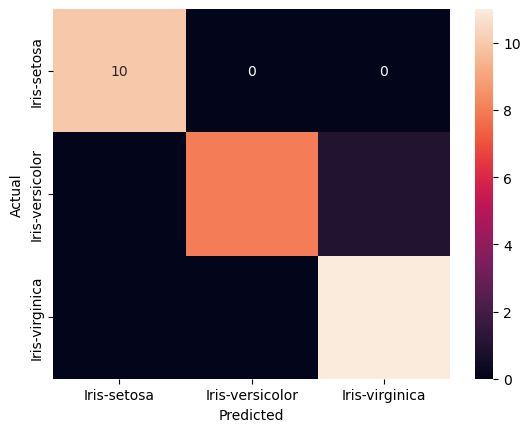

In [52]:
# 새 데이터 프레임 생성
df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['Actual'] = y_test
df['Predicted'] = y_pred

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.Actual,df.Predicted)
print(freq)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")

## 2. 의사 결정 트리(Decision Tree)

이제 의사 결정 트리에 동일한 방법을 적용해 봅시다. 먼저 max_depth=2와 min_samples_split=6을 사용하여 동일한 데이터 세트에 대한 의사 결정 트리를 훈련합니다. max_depth와 min_samples_split이 무엇을 의미하는지 기억하십니까? max_depth 및 min_Samples_split에 대한 자세한 내용은 이전 노트북(Model_Outputs)을 참조하세요.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import urllib.request

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', "iris.data")
df= pd.read_csv('iris.data', header=None)
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = names

print(df.head())
df.describe()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# 의사 결정 트리 모델 학습
dt = DecisionTreeClassifier(max_depth=2, min_samples_split=6)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=6)

x_test_scale 값을 사용하여 클래스를 예측합니다.

In [58]:
# 테스트 데이터로 예측
y_pred = dt.predict(X_test_scaled)

혼동 행렬을 구하고 출력합니다.

In [59]:
# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [60]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


- 잘못된 데이터 분류가 있습니까? 
- 몇 포인크가 잘못 분류되었습니까? 
- 잘못 분류된 포인트의 실제 클래스와 예측 클래스는 무엇이었습니까?

답변:
정답은 2번인데 3번으로 예측함

이 혼동 행렬에 대한 히트맵을 그려봅니다.

<Axes: xlabel='Predicted', ylabel='Actual'>

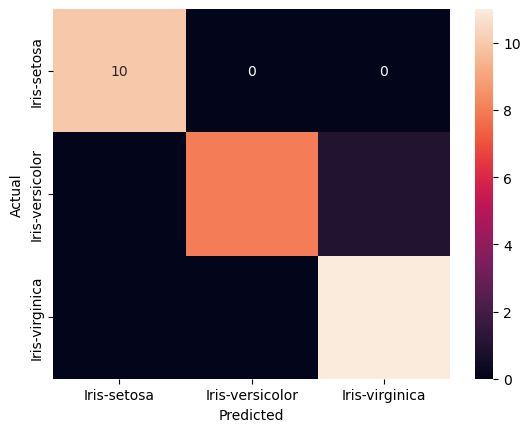

In [63]:
sns.heatmap(freq,annot=True,fmt="d")



KNN과 의사결정트리의 혼동 행렬을 비교하여 Iris flower 데이터 세트의 분류 문제에 대해 더 나은 모델은 무엇이라고 생각합니까? 왜 더 나은 모델입니까? 다른 학생들과 토론하고 아래에 답을 나열하세요.

In [43]:
# your answer here

또한 정확도가 비슷할 때 고려해야 할 다른 측정 지표도 있습니다. 대표적인 측정 지표로 정밀도(precision), 재현율(recall) 및 F1 점수가 있습니다. 측정 지표에 대한 자세한 내용은 이 [링크](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) 와 이 [링크](https://medium.com/@raghaviadoni/evaluation-metrics-i-precision-recall-and-f1-score-3ec25e9fb5d3) 를 참조하십시오. 이러한 측정 지표를 사용하여 모델을 어떻게 결정하시겠습니까?

In [44]:
# your answer here

모델을 결정한 후 모델을 사용하여 새로 수집된 데이터의 꽃 유형을 식별할 수도 있습니다. 예를 들어, 친구가 일부 꽃의 꽃받침 길이, 꽃받침 너비, 꽃잎 길이 및 꽃잎 너비를 측정하여 "iris_predict.data"라는 파일에 데이터를 저장했다고 가정해 봅시다. 친구는 측정된 값을 기반으로 이 꽃의 종류를 찾고 싶어합니다. 친구를 도와주기 위해 여러분의 모델을 사용할 수 있습니까? 친구가 측정한 꽃의 종류는 무엇입니까?
<font color=blue>힌트: 이전에 .predict 메서드를 사용하여 테스트 케이스의 꽃 유형을 구분한 것을 기억하십니까? 친구를 위해 꽃 종류를 구분하기 의해 동일하게 수행할 수 있습니다. 또한 꽃 종류를 찾기 전에 데이터의 척도를 조정해야 합니다. </font>

In [67]:
import urllib.request

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', "iris.data")
df2= pd.read_csv('iris.data', header=None)
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df2.columns = names

print(df2.head())
df2.describe()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
x_new = df2[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
x_new_scale = scaler.transform(x_new)

In [75]:
y_new = knn.predict(x_new_scale)
y_new2 = dt.predict(x_new_scale)

In [76]:
print(y_new)
print('- '*20)
print(y_new2)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor